# Part 1: Perceptron
## (ii)
### Method 1

- Uses raw data without normalisation.
- Weights and biases start from zero and rely entirely on the data and the training process to adjust naturally.
- A higher learning rate (0.1) is used.

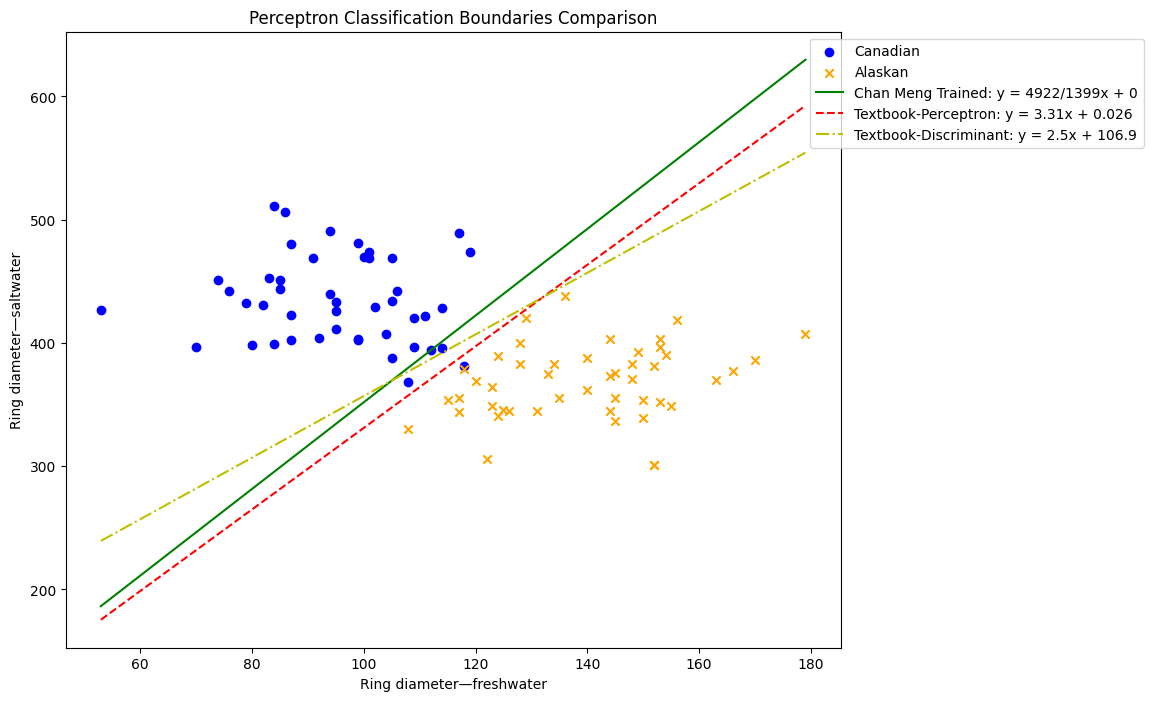

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fractions import Fraction

# Load data
df = pd.read_csv('Fish_data.csv')
X = df.iloc[:, 0:2].values  # Input features
y = df.iloc[:, 2].values    # Labels (0: Canadian, 1: Alaskan)

# Initialize weights and bias
w = np.zeros(2)
b = 0  # Adjusted initial bias
learning_rate = 0.1  # Increased learning rate for faster convergence
epochs = 200

# Perceptron learning rule
for epoch in range(epochs):
    for i in range(len(X)):
        # Compute the linear combination and apply the step function
        z = np.dot(X[i], w) + b
        pred = 1 if z >= 0 else 0
        # Update weights and bias if there is a misclassification
        if y[i] != pred:
            error = y[i] - pred
            w += learning_rate * error * X[i]
            b += learning_rate * error

# Define function to plot decision boundary and textbook equations
def plot_decision_boundary(X, y, w, b):
    plt.figure(figsize=(10, 8))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', marker='o', label='Canadian')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='orange', marker='x', label='Alaskan')
    
    # Plot perceptron boundary
    x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 200)
    
    # y_values = -(b + w[0] * x_values) / w[1]
    # plt.plot(x_values, y_values, 'g', label=f'Chan Meng Trained: y = {-w[0]/w[1]:.2f}x + {-b/w[1]:.2f}')
    
    # The fractions.Fraction class is used to convert the weights and bias coefficients of the model's training results so that the linear equation is presented as a minimal fraction.
    # The use of the limit_denominator() method ensures that the fractions are concise and easy to understand, which helps improve the readability and accuracy of the equations.
    slope = Fraction(-w[0]/w[1]).limit_denominator()
    intercept = Fraction(-b/w[1]).limit_denominator()
    y_values = slope * x_values + intercept
    plt.plot(x_values, y_values, 'g', label=f'Chan Meng Trained: y = {slope}x + {intercept}')
    
    # Textbook equations
    y_textbook_1 = 0.026 + 3.31 * x_values  # Equation 2.15a
    y_textbook_2 = 106.9 + 2.5 * x_values   # Equation 2.15b
    plt.plot(x_values, y_textbook_1, 'r--', label='Textbook-Perceptron: y = 3.31x + 0.026')
    plt.plot(x_values, y_textbook_2, 'y-.', label='Textbook-Discriminant: y = 2.5x + 106.9')
    
    plt.xlabel('Ring diameter—freshwater')
    plt.ylabel('Ring diameter—saltwater')
    plt.title('Perceptron Classification Boundaries Comparison')
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.0))
    plt.show()

# Plot the final classification boundary with textbook lines
plot_decision_boundary(X, y, w, b)


### Method 2

- The features were normalised so that each feature had a mean of 0 and a standard deviation of 1.
- Weights and biases are initialised close to the target boundaries, based on a priori knowledge and target classification boundaries (Textbook - The perceptron classification boundary: x2 = 3.31x1 + 0.026).
- The learning rate is slightly lower (0.05) and more suitable for fine tuning.

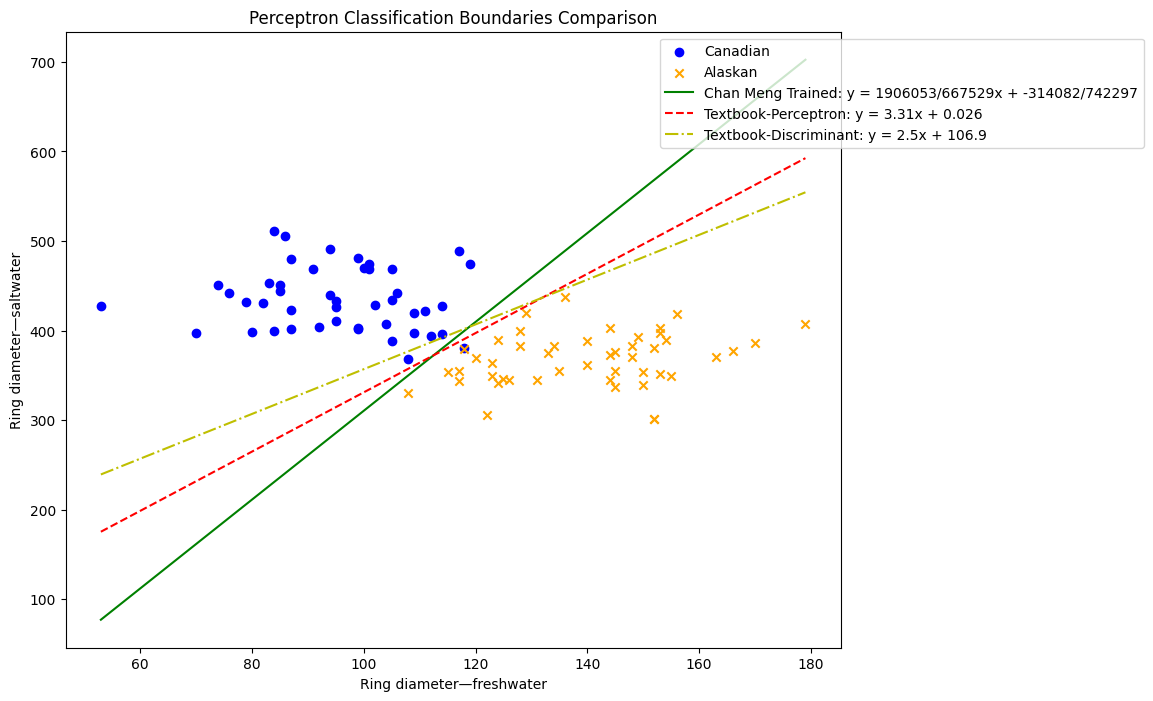

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fractions import Fraction

# Load data
df = pd.read_csv('Fish_data.csv')
X = df.iloc[:, 0:2].values  # Input features
y = df.iloc[:, 2].values    # Labels (0: Canadian, 1: Alaskan)

# Normalize features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

# Initialize weights and bias closer to the target boundary
initial_slope = 3.31
intercept = 0.026
w = np.array([initial_slope, -1])  # Initial weights approximating the target slope
b = intercept

learning_rate = 0.05  # Optimized learning rate
epochs = 200

# Perceptron learning rule
for epoch in range(epochs):
    for i in range(len(X_scaled)):
        # Compute the linear combination and apply the step function
        z = np.dot(X_scaled[i], w) + b
        pred = 1 if z >= 0 else 0
        # Update weights and bias if there is a misclassification
        if y[i] != pred:
            error = y[i] - pred
            w += learning_rate * error * X_scaled[i]
            b += learning_rate * error

# Define function to plot decision boundary and textbook equations
def plot_decision_boundary(X, y, w, b, X_mean, X_std):
    plt.figure(figsize=(10, 8))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', marker='o', label='Canadian')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='orange', marker='x', label='Alaskan')

    # Plot perceptron boundary
    x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 200)
    
    # slope = -w[0]/w[1]
    # intercept = -b/w[1]
    # y_values = slope * (x_values - X_mean[0]) / X_std[0] * X_std[1] + X_mean[1] + intercept
    # plt.plot(x_values, y_values, 'g', label=f'Chan Meng Trained: y = {slope:.2f}x + {intercept:.2f}')
    
    # fractions.Fraction is used to convert the results of weight and bias calculations into fraction form and limit the size of the denominator of the fraction via the limit_denominator() method to keep the output concise and readable.
    slope = Fraction(-w[0]/w[1]).limit_denominator()
    intercept = Fraction(-b/w[1]).limit_denominator()
    y_values = slope * (x_values - X_mean[0]) / X_std[0] * X_std[1] + X_mean[1] + intercept
    plt.plot(x_values, y_values, 'g', label=f'Chan Meng Trained: y = {slope}x + {intercept}')
    
    # Textbook equations
    y_textbook_1 = 0.026 + 3.31 * x_values
    y_textbook_2 = 106.9 + 2.5 * x_values
    plt.plot(x_values, y_textbook_1, 'r--', label='Textbook-Perceptron: y = 3.31x + 0.026')
    plt.plot(x_values, y_textbook_2, 'y-.', label='Textbook-Discriminant: y = 2.5x + 106.9')
    
    plt.xlabel('Ring diameter—freshwater')
    plt.ylabel('Ring diameter—saltwater')
    plt.title('Perceptron Classification Boundaries Comparison')
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.0))
    plt.show()

# Plot the final classification boundary with textbook lines
plot_decision_boundary(X, y, w, b, X_mean, X_std)


In summary, the following are the linear equations obtained by these two methods and their analyses:

### Linear equations obtained using method 1
- **Fractional Form**：$$ y = \frac{4922}{1399}x $$
- **Decimal Format**：$$ y = 3.5225x $$

### Linear equations obtained using method 2
- **Fractional Form**：$$ y = \frac{1906053}{667529}x - \frac{314082}{742297} $$
- **Decimal Format**：$$ y = 2.8537x - 0.4231 $$

### Comparison of classification boundary lines
Compare this with the **Textbook-Perceptron** equation (the perceptron classification boundary (2.15a)) $$ y = 3.31x + 0.026 $$. This equation misclassifies 1 Canadian point to the Alaskan side of the equation, and given that there are 47 data in total for Alaskan and 45 data in total for Canadian, the correct classification rate is:
$$ \text{Accuracy} = \frac{45 - 1 + 47}{45 + 47} \times 100\% = 98.91\% $$

### Percentage of correct classifications for method 1
The straight line of Method 1 misclassified three Canadian points to the Alaskan side and one other Canadian point on the classification boundary line, which was calculated to be correctly classified:
$$ \text{Accuracy} = \frac{45 - 3 - 0.5 + 47}{45 + 47} \times 100\% \approx 95.45\% $$

### Percentage of correct classifications for method 2
The straight line of Method 2 misclassified only 1 Canadian point to the Alaskan side, with a correct classification rate:
$$ \text{Accuracy} = \frac{45 - 1 + 47}{45 + 47} \times 100\% = 98.91\% $$

### Conclusion 

Method 2 generated more accurate classification boundary lines. The reasons for this improved accuracy include:

1. **Feature standardisation**: by standardising the input features, Method 2 makes it easier for the model to learn and adapt to data at different scales, thus improving its generalisation ability. 
2. **Initial weights close to ideal boundaries**: in Method 2, the selection of initial weights and biases is more scientific, based on knowledge of the data distribution and the objective function, thus enabling faster and more accurate adjustment to the optimal classification boundaries.

Method 2 not only takes into account the standardised processing of data, but also makes the final classification boundary more accurate by reasonably initialising the weights and biases. Therefore, it provides a more accurate and practical model for the classification task.

### Reference:

Samarasinghe, S. (2006). *Neural networks for applied sciences and engineering: From fundamentals to complex pattern recognition*. Auerbach Publishers, Incorporated. (pp. 39). Formulas 2.15a and 2.15b in Chapter 2, "Fundamentals of Neural Networks and Models for Linear Data Analysis."